# Evaluation des classifieurs

## Contenu de la séance d'aujourd'hui

- Quel est l'intérêt de **l'évaluation d'un modèle**, et quelles sont les procédures d'évaluations les plus connues?
- Quand est ce qu'on utilise le **taux d'erreur (classification accuracy)**, et quelles sont ses limites?
- Performance d'un classifieur en utilisant la **matrice de confusion (confusion matrix)**.
- Quelles sont les **indicateurs de performance (metrics)** que l'on peut calculer à partir d'une matrice de confusion?
- Comment améliorer les performances d'un classifieur en **changeant le seuil(threshold) de classification**?
- Quel est l'intérêt de la **courbe ROC**?
- la différence entre **Area Under the Curve (AUC)** et le taux d'erreur d'un classifieur?

## Evaluation d'un modèle

- Nous avons besoin d'un moyen pour choisir entre les modèles: different types de modèles, les paramètres du modèle (tuning parameters), choix des attributs
- On utilise ** une procedure d'evaluation du modèle ** pour estimer à quel point le modèle est capable de généraliser pour de nouvelles données
- Ceci nécessite des **indicateurs de performances** afin de quantifier la performance d'un modèle et pouvoir la comparer avec celles des autres modèles

### Les indicateurs de performance d'un modèle

- **Problèmes de Regression     :** Mean Absolute Error, Mean Squared Error, Root Mean Squared Error
- **Problèmes de Classification :** Le taux d'erreur de classification ou taux de prédiction=1-taux'derreur (Classification accuracy)

### Quel indicateur utiliser?

Base de données : Breast Cancer

![Comparaison prob](./images/Comparison_prob.png)

![Comparaison prob](./images/comparison_classement.png)

##  Le taux de prédiction de classification

In [2]:
# charger les données dans un dataframe de Pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('./pima-indians-diabetes.data.txt', header=None, names=col_names)

In [3]:
# afficher les 5 premières lignes
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- **Label   :** indique si la personne est diabétique ou non, c'est ce qu'on souhaite prédire
- **Question:** peut-on prédire de manière efficace si une personne est diabétique en fonction des mesures médicales (attributs)?

In [4]:
# On définit X et y, on va supposer que nous n'avons que 4 attributs : 'pregnant', 'insulin', 'bmi', 'age'
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']
X = pima[feature_cols]
y = pima.label

In [5]:
# diviser X et y en training and testing
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=0)

In [6]:
# on va apprendre un modèle de régression logistique
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
# On prédit pour les données de test
y_pred_class = logreg.predict(X_test)

**Classification accuracy:** pourcentage de prédictions correctes, c'est le nombre d'instances correctement prédite sur le nombre d'instances total

### Conventions
- Dans les problèmes de classification binaire, la classe 0 est considérée comme étant la classe négative et la classe 1 comme étant la classe positive
- les méthodes du package metrics de Scikit-learn supposent toujours que le premier paramètre fournit correspond aux vrais valeurs et que le deuxième paramètre correspond aux valeurs prédites

In [9]:
# accuracy
from sklearn import metrics
print (metrics.accuracy_score(y_test, y_pred_class))

0.692708333333


Le taux de prédiction est 0.6927, ce qui à première vue peut sembler satisfaisant **Mais** est-ce le cas?
Nous devons comparer la performance de notre score avec un score de base.

**Null accuracy:** est le taux de prédiction qui peut être atteint en prédisant toujours la classe dominante.
Nous allons comparer les perfformances de notre modèle avec celles de **Null**

In [10]:
# on examine la distribution des classes des données de test, la classe dominante est la classe 0 
print ('classe 0 :', sum(y_test==0))
print ('classe 1 :', sum(y_test==1))

classe 0 : 130
classe 1 : 62


In [11]:
import numpy as np
zero_preds = np.zeros_like(y_test) #Un tableau de 0 (classe 0) de la même taille que y_test
print ('Null accuracy :',metrics.accuracy_score(y_test, zero_preds))

Null accuracy : 0.677083333333


 La performance du modèle : 0.6927 est presque similaire à celle du modèle **Null**. On peut donc en conclure sur base de l'indicateur de performance **taux de prédiction** que notre modèle n'est pas très performant

Afin de mieux comprendre pourquoi notre modèle n'est pas performant, nous allons copmparer visuellement les **vrais** valeurs avec celles **prédites**

In [11]:
# Afficher les 25 premières valeurs
print 'True:', y_test.values[0:25]
print 'Pred:', y_pred_class[0:25]

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [12]:
#..................Que REMARQUEZ VOUS?

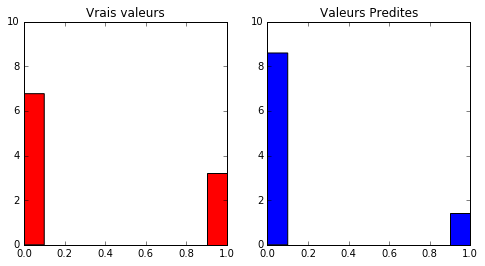

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
_=plt.hist(y_test.values, color='red', normed=True)
plt.title('Vrais valeurs')
_=plt.ylim(0,10)
plt.subplot(1,2,2)
_=plt.hist(y_pred_class, color ='blue',  normed=True)
plt.title('Valeurs Predites')
_=plt.ylim(0,10)

**Conclusion:**

- le taux de prédiction(accuracy) est **l'indicateur de performance le plus facile à comprendre**
- Mais, ne tient pas compte de la **distribution** des valeurs prédites
- Et, ne dit rient sur les **"types" d'erreurs** que la classifieur fait

## Matrice de confusion (Confusion matrix)

Table qui décrit de manière détaillés les performances d'un modèle de classification

In [13]:
print (metrics.confusion_matrix(y_test, y_pred_class))

[[118  12]
 [ 47  15]]


![Small confusion matrix](./images/09_confusion_matrix_1.png)

- Chaque instance du Test set appartient à **exactement une et une seule case**
- C'est une matrice 2x2 parceque nous avons **2 classe**. de manière plus générale, c'est une matrice NxN où N est le nombre de classes à prédire
- Le format utilisé dans ce cours n'est pas universel, les colonnes Predicted et Actual peuvent être inversées

**Terminologie de base**

- **Vrais Positifs (True Positives)  (TP):** Observations **positives (classe positive=1)** pour lesquels nous avons prédit **correctement** qu'elles sont **positives ** càd je prédis positif et c'est **Vrai**
- **Vrais Négatifs (True Negatives)  (TN):** Observations **négatives (classe négative=0)** pour lesquels nous avons prédit **correctement** qu'elles sont **négatives** càd je prédis négatif et c'est **Vrai**
- **Faux Positifs  (False Positives) (FP):** Observations **négatives (classe négative=0)** pour lesquels nous avons prédit **faussement** qu'elles sont **positives** ("erreur de Type I") càd je prédis positif et c'est **FAUX**
- **Faux négatifs  (False Negatives) (FN):** Observations **positives (classe positive=1)** pour lesquels nous avons prédit **faussement** qu'elles sont **négatives** ("erreur de Type II") càd je prédis négatif et c'est **Faux**

In [15]:
print 'True:', y_test.values[0:25]
print 'Pred:', y_pred_class[0:25]

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [16]:
# on stocke la matrice de confusion et on récupère les TP, TN, FP, FN
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

![Large confusion matrix](./images/09_confusion_matrix_2.png)

## Indicateurs de performance (metrics) à partir de la matrice de confusion

**Taux de prédiction (accuracy):** pourcentage d'instances **correctement** classifiées?

In [17]:
print (TP + TN) / float(TP + TN + FP + FN)
print metrics.accuracy_score(y_test, y_pred_class)

0.692708333333
0.692708333333


**Erreur de classification (Classification Error ou Misclassification Rate):** pourcentage d'instances **incorrectement** classifiées

In [18]:
print (FP + FN) / float(TP + TN + FP + FN)
print 1 - metrics.accuracy_score(y_test, y_pred_class)

0.307291666667
0.307291666667


**Sensibilité (Sensitivity)** ou **Rappel (Recall)** ou **"True Positive Rate" :** Quand la vrai valeur est positive combien de fois je prédis positif?

- La "Sensibilité" du classifieur à detecter les instances positives

In [79]:
print TP / float(TP + FN)
print metrics.recall_score(y_test, y_pred_class)

0.241935483871
0.241935483871


**Precision:** Lorsque je prédis une valeur comme positive, combien de fois ma prédiction est correcte?

- la "précision" du classifieur lorsqu'il prédit des instances positives?

In [19]:
print TP / float(TP + FP)
print metrics.precision_score(y_test, y_pred_class)

0.555555555556
0.555555555556


**Spécificité (Specificity):** Quand la vrai valeur est negative, combien de fois je prédis négatif?


In [21]:
print TN / float(TN + FP)

0.907692307692


- **False Positive Rate:** Quand la vrai valeur est negative, combien de fois je prédis positif?
- **FPR = 1-Specificity**

In [22]:
print FP / float(TN + FP)

0.0923076923077


**Conclusion:**

- La matrice de Confusion donne "plus de détails" sur les performances du classifieur
- Permet de calculer des **metrics**, sur lesquels on peut se baser pour effectuer le choix du modèle adéquat pour un problème donné

**Exemple de choix de metrics en fonction du problème posé?**

- Le choix de la metric à utiliser dépend de  **l'objectif métier**
- **Detection de Spam** (classe positive est "spam"): Optimier la **precision ou specificity** parceque les faux negatives (spam va dans inbox) sont plus acceptables que les faux positives (non-spam va dans spam). DONC,**on essaye de minimiser les Faux positifs => maximiser la précision ou la spécificité**
- **Detection de Transactions frauduleuses ** (classe positive est "fraude"): Optimiser pour **sensitivity** parceque les faux positives (transactions normal détéctées comme frauduleuses) sont plus acceptables que les faux negatives (transactions frauduleuses non detectées). DONC,**on essaye de minimiser les Faux négatifs => maximiser la sensibilité**

**Dans le problème qui nous concerne (Diabète), que faut-il optimiser?**

Réponse et pourquoi?

## Ajustement du seuil de classification pour de meilleurs performances

- Beaucoup de classifieurs ne prédisent pas uniquement 0 ou 1 mais sont aussi capable de prédire le degré d'appartenance à une classe sous forme de probabilité
- Par défaut, le seuil utilisé pour transformer une probabilité en 0 ou 1 est égal à 0.5
- En modifiant ce seuil, il est possible d'améliorer les performances (sans modifier le modèle) pour le problème posé

In [20]:
# afficher les 10 premières prédictions
logreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [81]:
# afficher les degrés d'appartenance (les 10 premiers)
logreg.predict_proba(X_test)[0:10, :]

array([[ 0.63247571,  0.36752429],
       [ 0.71643656,  0.28356344],
       [ 0.71104114,  0.28895886],
       [ 0.5858938 ,  0.4141062 ],
       [ 0.84103973,  0.15896027],
       [ 0.82934844,  0.17065156],
       [ 0.50110974,  0.49889026],
       [ 0.48658459,  0.51341541],
       [ 0.72321388,  0.27678612],
       [ 0.32810562,  0.67189438]])

In [24]:
# afficher les degrés d'appartenance pour la classe 1 (les 10 premiers)
logreg.predict_proba(X_test)[0:10, 1]

array([ 0.36752429,  0.28356344,  0.28895886,  0.4141062 ,  0.15896027,
        0.17065156,  0.49889026,  0.51341541,  0.27678612,  0.67189438])

In [82]:
# on stocke les degrés d'appartenance pour la classe 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

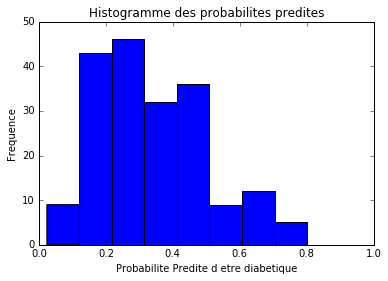

In [83]:
# histogramme des probabilités prédites
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogramme des probabilites predites')
plt.xlabel('Probabilite Predite d etre diabetique')
plt.ylabel('Frequence')

**Diminuer le seuil** de prédiction du diabète pour **augmenter la sensitivity** du classifieur

In [89]:
# Predire un diabete si la probabilité prédite est supérieure à 0.3
y_pred_class = np.array(y_pred_prob>0.3, dtype=int)

In [90]:
# afficher les 10 premières probabilités prédites
y_pred_prob[0:10]

array([ 0.36752429,  0.28356344,  0.28895886,  0.4141062 ,  0.15896027,
        0.17065156,  0.49889026,  0.51341541,  0.27678612,  0.67189438])

In [91]:
# afficher les 10 premières classes prédites
y_pred_class[0:10]

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1])

In [92]:
# ancienne matrice de confusion (seuil par défaut = 0.5)
print confusion

[[118  12]
 [ 47  15]]


In [94]:
# nouvelle matrice de confusion (seuil = 0.3)
print metrics.confusion_matrix(y_test, y_pred_class)

[[80 50]
 [16 46]]


In [95]:
# la sensitivity a augmenté (avant sensitivité = 0.24)
print 46 / float(46 + 16)

0.741935483871


In [96]:
# la spécificité a diminué (avant spécificité = 0.91)
print 80 / float(80 + 50)

0.615384615385


**Conclusion:**

- Le Seui peut être **modifié** afin d'augmenter la sensitivité ou la specificité
- Sensitivity et specificity possèdent une **relation inverse**. Lorsque l'un augmente, l'autre diminue

## Courbes ROC (ROC Curves),  Surface sous la courbe ( Area Under the Curve (AUC) )

**Question:** Ne serait-il pas intéressant de voir de quelle manière la sensitivity et la specificity sont affectées par différents **seuils**, sans modifier le seuil?

**Réponse:** Tracer la courbe ROC

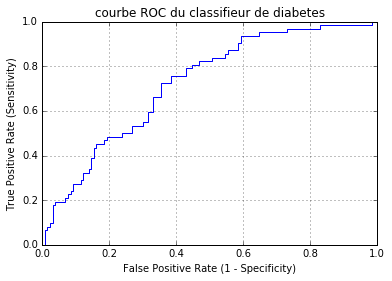

In [97]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('courbe ROC du classifieur de diabetes')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


- la courbe ROC vous aide à **choisir un seuil** afin d'avoir un certain équilibre entre la sensitivity et la specificity qui satisfait votre besoin


### AUC est la **surface** se trouvant en **dessous de la courbe ROC**

In [98]:
print metrics.roc_auc_score(y_test, y_pred_prob)

0.724565756824


- Interprétation de AUC : si on choisit de manière aléatoire une instance positive et une instance négative, AUC represente la probabilité que le classifieur va assigner  **une plus grande probabilité prédite** à l'instance positive par rappart à l'instance négative.
- AUC is très utile lorsque les **classes ne sont pas équilibrée (high class imbalance)** (contrairement à l' accuracy).

# jkgjkbgkjb
#### jkbhkjhbk

- kjhkjbhkj ** jkhkjhkj ** jkghkj
- jkgkjgjkg

In [87]:
x = np.array( [0.6, 0.4, 0.2] )

In [88]:
np.array (x>0.3 , dtype=int )

array([1, 1, 0])